<a href="https://colab.research.google.com/github/M2kishore/Data-Science-1/blob/main/CB_EN_U4CSE19127_QP_Descriptive_Statistics%2BEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read and Preprocess

#Instruction: Import required libraries here

In [92]:
# Import
from matplotlib import pyplot as plt

In [3]:
import pandas as pd
import numpy as np

#Instruction: From this [link](https://github.com/dayanandv/Data-Science/tree/main/Evaluation%201_Preprocessing), read the following files into dataframes:

    

1.   LokSabhaMPs.xls to the dataframe `mps`
2.   Each sheet (there are six in total) of the file Seventeenth Lok Sabha_Attendance.xlsx to a list of DataFrames named `attendance`; i.e. each element of the list will be a DataFrame corresponding to a sheet in the file which represents one session.

Preprocess, so that:

1. The dataframe header map to the row number where column names are listed.
2. Extra space at the end of Member Name are handled.

Description of the attendance dataset from http://loksabhaph.nic.in

S= The Member Signed the Register

S*= The Member signed through Mobile Attendance Application

S#= The Member signed through both the Register & Mobile Attendance Application

NS= The Member did not sign the register. (A Member might have attended the sitting of the House on a particular day but did not sign or forgot to sign the Register for that day )

NS@= Member was present but forgot to sign the Attendance Register

NR= Not Required. (Hon'ble Speaker, Deputy Speaker, Prime Minister and Minister usually do not sign the Members' Attendance Register)


In [44]:
mps = pd.read_excel('https://github.com/dayanandv/Data-Science/blob/main/Evaluation%201_Preprocessing/LokSabha_MPs.xls?raw=true')

In [77]:
attendance = pd.read_excel('https://github.com/dayanandv/Data-Science/blob/main/Evaluation%201_Preprocessing/Seventeenth%20Lok%20Sabha_Attendance.xlsx?raw=true', sheet_name = None)
print(mps)
mps = mps.drop(0)
mps.columns = mps.iloc[0]
mps = mps.reset_index(drop=True)
mps = mps.drop(0)
mps = mps.reset_index(drop=True)

1   Shri Narayana Swamy Abbaiah  ...   Chitradurga (SC)(Karnataka)
0           Dr. Farooq Abdullah  ...  Srinagar (Jammu and Kashmir)
1    Shri Deepak (Dev) Adhikari  ...          Ghatal (West Bengal)
2        Shri Dibyendu Adhikari  ...          Tamluk (West Bengal)
3     Shri Sisir Kumar Adhikari  ...          Kanthi (West Bengal)
4              Adv. A. M. Ariff  ...            Alappuzha (Kerala)
..                          ...  ...                           ...
533  Dr. Krishnapal Singh Yadav  ...         Guna (Madhya Pradesh)
534    Shri Mulayam Singh Yadav  ...      Mainpuri (Uttar Pradesh)
535       Shri Ram Kripal Yadav  ...           Pataliputra (Bihar)
536      Shri Shyam Singh Yadav  ...       Jaunpur (Uttar Pradesh)
537       Shri Tokheho Yepthomi  ...           Nagaland (Nagaland)

[538 rows x 3 columns]


# Q1. Edit the function q1 such that it returns a tuple containing the the number of rows of `mps` and number of elements in `attendance` respectively.

In [58]:
def q1():
  # Write your code here
  nor_attendance = 0
  nor_mps = mps.shape[0]
  for i in range(1,7):
    x = str(i)
    nor_attendance = nor_attendance+attendance[x].shape[0]
  return (nor_mps, nor_attendance)

q1()

(538, 2909)

#Instruction: Have the attendance percentages of each session (sheet) calculated and added to its respective dataframe as a column named `Attendance Percentage`.

In [78]:
# Write your code here
for i in range(1,7):
    x = str(i)
    attendance[x] = pd.DataFrame(attendance[x])
for i in range(1,7):
  x = str(i)
  attendance[x]['Attendance Percentage'] = (attendance[x]['No. of days Members signed the Register']/(attendance[x]['No. of days Members signed the Register']+attendance[x]['No. of days Members not signed the Register'])*100)

#Q2. Edit the function q2 such that it returns the percentage of MPs among those who attended session 1 (round to two decimal places) who had 100% attendance.

In [84]:
def q2():
  # Write your code here
  percentage = 0
  totalcount = len(attendance['1'].index)
  count = 0
  df = pd.DataFrame(attendance['1'])
  for i in range(totalcount):
    if df.loc[i,'Attendance Percentage'] == 100:
      count = count + 1;
  percentage = (count/totalcount) * 100
  return round(percentage,2)

q2()

20.23

#Q3. Edit the function q3 such that it returns the skew value (round to two decimal places) of the Attendance Percentages of MPs in session 2 (sheet 2).  

In [90]:
def q3():
  # Write your code here
  df = pd.DataFrame(attendance['2'])
  skew = df.skew(axis = 0, skipna = True)[3]
  return round(skew,2)

q3()

-1.64

#Q4. Edit the function q4 such that it returns the kurtosis value of the number of days that the MPs have not signed in the register during session 3 (sheet 3).  

In [91]:
def q4():
  # Write your code here
  df3 = pd.DataFrame(attendance['3'])
  kurt = df3['No. of days Members not signed the Register'].kurtosis()
  return round(kurt,2)

q4()

1.56

#Instruction: Plot a histogram of the Attendance Percentage' column of session 4 (sheet 4) and use it to answer the following question.

(array([  8.,   5.,  10.,  11.,  13.,  12.,  25.,  27.,  65., 250.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <a list of 10 Patch objects>)

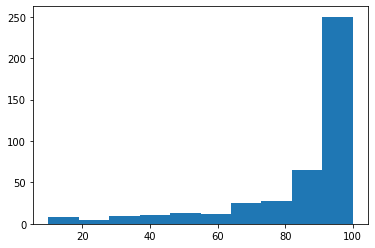

In [96]:
# Write your code here
df4 = pd.DataFrame(attendance['4'])
plt.hist(df4['Attendance Percentage'])


#Q5. Edit the function q5 such that it returns the boolean value corresponding to whether the histogram of the `Attendance Percentage` column of any arbitrary session shows a heavily skewed distribution (True/False). The session number is  to be passed onto the function as an integer argument.

For this example, assume that we call a distribution as heavily skewed if it's absolute skew value is **more than 1.7**.

In [100]:
def q5(session_number):
  # Write your code here
  df = pd.DataFrame(attendance[str(session_number)])
  answer = False
  if(df['Attendance Percentage'].kurtosis() > 0.7):
    answer = True
  return answer

q5(5)

False

#Q6. Edit the function q6 such that it goes through the mean values of the attendance percentages of each session and returns a list named `outliers` with the number(s) of the session(s) which is/are outlier(s). If there are no outliers return an empty list.

In [110]:
def q6():
  #Write your code here
  outliers = []
  for i in range(1,7):
    df = pd.DataFrame(attendance[str(i)])
    mean = df['Attendance Percentage'].mean()
    sd = 3*df['Attendance Percentage'].std()
    for j in range(len(df.index)):
      if(df.loc[j,'Attendance Percentage'] > mean+(sd)):
        if i not in outliers:
          outliers.append(i)
        outliers.append(i)
      if(df.loc[j,'Attendance Percentage'] < mean-(sd)):
        if i not in outliers:
          outliers.append(i)

  return outliers

q6()

[1, 2, 3, 4, 6]

#Q7. Edit the function q7 such that it returns a list named `dnos` having the 'Division No' (in the ascending order) of those MPs who are the most consistent in their attendance, as per the conditions listed below.

* Consider only those MPs who have attended at least two sessions. 
* For this example, assume that consistency can be calculated via the standard 
deviation of their attendance percentages across sessions. The lesser the standard deviation, better consistant the attendace is.

In [ ]:
def q7():
  # Write your code here
  dnos = []
  for in range()
  return dnos

q7()